In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
files_simu = [
    './simulation/2011_MagDown.root', 
    './simulation/2015_MagDown.root',
    './simulation/2015_MagUp.root',
    './simulation/2016_MagDown.root',
    './simulation/2016_MagUp.root',
    './simulation/2017_MagDown.root',
    './simulation/2017_MagUp.root',
    './simulation/2018_MagDown.root',
    './simulation/2018_MagUp.root'
]

files_real_data = [
    './real_data/2011_MagDown_data.root', 
    './real_data/2011_MagUp_data.root'
]
simu_data = uproot.concatenate(files_simu, cut = 'Bc_BKGCAT==0', library='pd')
real_data = uproot.concatenate(files_real_data, library='pd')
real_data['delta_mass'] = real_data['Dst_M'] - real_data['D0_M']
simu_data['delta_mass'] = simu_data['Dst_M'] - simu_data['D0_M']

/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_1876/169099.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_data['delta_mass'] = real_data['Dst_M'] - real_data['D0_M']
/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_1876/169099.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simu_data['delta_mass'] = simu_data['Dst_M'] - simu_data['D0_M']


In [76]:
#SELECTIONS
THE_BIG_SELECTION = (
    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(delta_mass > 139) & (delta_mass < 151) & '
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)

Notion_model_selection_Dst_original = (

    '(delta_mass > 135) & (delta_mass < 160) & '
    '(Dst_ENDVERTEX_CHI2 < 25.) &'
    'abs(Dst_M - 2010.) < 50. &'
    'Dst_PT > 1250 &'
    'pi_soft_PT > 50. &'
    'pi_soft_TRACK_CHI2NDOF < 30. &'
    'pi_soft_TRACK_GhostProb < 0.6 &'
#already applied:
    'Bc_ENDVERTEX_CHI2 < 9. &'
    'Bc_IPCHI2_OWNPV < 25. &'
    'Bc_DIRA_OWNPV > 0.99 &'

    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)
Notion_model_selection_Dst = (

    '(delta_mass > 140) & (delta_mass < 150) & '
    '(Dst_ENDVERTEX_CHI2 < 9.) &'
    'abs(Dst_M - 2010.) < 40. &'
    'Dst_PT > 2700. &'
    'pi_soft_PT > 250. &'
    'pi_soft_TRACK_CHI2NDOF < 2. &'
    'pi_soft_TRACK_GhostProb < 0.4 &'
#already applied:
    'Bc_ENDVERTEX_CHI2 < 4.2 &'
    'Bc_IPCHI2_OWNPV < 10. &'
    'Bc_DIRA_OWNPV > 0.99 &'

    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)

Notion_model_selection_Dst_without_delta_mass = (

    '(Dst_ENDVERTEX_CHI2 < 25.) &'
    'abs(Dst_M - 2010.) < 50. &'
    'Dst_PT > 1250 &'
    'pi_soft_PT > 50. &'
    'pi_soft_TRACK_CHI2NDOF < 30. &'
    'pi_soft_TRACK_GhostProb < 0.6 &'

    'Bc_ENDVERTEX_CHI2 < 9. &'
    'Bc_IPCHI2_OWNPV < 25. &'
    'Bc_DIRA_OWNPV > 0.99 &'

    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)

Notion_model_selection_Dst_without_Dst_ENDVERTEX_CHI2 = (

    '(delta_mass > 135) & (delta_mass < 160) & '
    'abs(Dst_M - 2010.) < 50. &'
    'Dst_PT > 1250 &'
    'pi_soft_PT > 50. &'
    'pi_soft_TRACK_CHI2NDOF < 30. &'
    'pi_soft_TRACK_GhostProb < 0.6 &'

    'Bc_ENDVERTEX_CHI2 < 9. &'
    'Bc_IPCHI2_OWNPV < 25. &'
    'Bc_DIRA_OWNPV > 0.99 &'

    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)

Notion_model_selection_Dst_without_mass_difference = (

    '(delta_mass > 135) & (delta_mass < 160) & '
    '(Dst_ENDVERTEX_CHI2 < 25.) &'
    'Dst_PT > 1250 &'
    'pi_soft_PT > 50. &'
    'pi_soft_TRACK_CHI2NDOF < 30. &'
    'pi_soft_TRACK_GhostProb < 0.6 &'

    'Bc_ENDVERTEX_CHI2 < 9. &'
    'Bc_IPCHI2_OWNPV < 25. &'
    'Bc_DIRA_OWNPV > 0.99 &'

    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)

Notion_model_selection_Dst_without_Dst_PT = (

    '(delta_mass > 135) & (delta_mass < 160) & '
    '(Dst_ENDVERTEX_CHI2 < 25.) &'
    'abs(Dst_M - 2010.) < 50. &'
    'pi_soft_PT > 50. &'
    'pi_soft_TRACK_CHI2NDOF < 30. &'
    'pi_soft_TRACK_GhostProb < 0.6 &'

    'Bc_ENDVERTEX_CHI2 < 9. &'
    'Bc_IPCHI2_OWNPV < 25. &'
    'Bc_DIRA_OWNPV > 0.99 '
)

Notion_model_selection_Dst_without_pi_soft_PT = (

    '(delta_mass > 135) & (delta_mass < 160) & '
    '(Dst_ENDVERTEX_CHI2 < 25.) &'
    'abs(Dst_M - 2010.) < 50. &'
    'Dst_PT > 1250 &'
    'pi_soft_TRACK_CHI2NDOF < 30. &'
    'pi_soft_TRACK_GhostProb < 0.6 &'

    'Bc_ENDVERTEX_CHI2 < 9. &'
    'Bc_IPCHI2_OWNPV < 25. &'
    'Bc_DIRA_OWNPV > 0.99 &'

    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)
Notion_model_selection_Dst_without_pi_soft_TRACK_CHI2NDOF = (

    '(delta_mass > 135) & (delta_mass < 160) & '
    '(Dst_ENDVERTEX_CHI2 < 25.) &'
    'abs(Dst_M - 2010.) < 50. &'
    'Dst_PT > 1250 &'
    'pi_soft_PT > 50. &'
    'pi_soft_TRACK_GhostProb < 0.6 &'

    'Bc_ENDVERTEX_CHI2 < 9. &'
    'Bc_IPCHI2_OWNPV < 25. &'
    'Bc_DIRA_OWNPV > 0.99 '
)

Notion_model_selection_Dst_without_pi_soft_TRACK_GhostProb = (

    '(delta_mass > 135) & (delta_mass < 160) & '
    '(Dst_ENDVERTEX_CHI2 < 25.) &'
    'abs(Dst_M - 2010.) < 50. &'
    'Dst_PT > 1250 &'
    'pi_soft_PT > 50. &'
    'pi_soft_TRACK_CHI2NDOF < 30. &'

    'Bc_ENDVERTEX_CHI2 < 9. &'
    'Bc_IPCHI2_OWNPV < 25. &'
    'Bc_DIRA_OWNPV > 0.99 &'

    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)

#FOR Bc:
Notion_model_selection_Dst_without_Bc_ENDVERTEX_CHI2 = (

    '(delta_mass > 135) & (delta_mass < 160) & '
    '(Dst_ENDVERTEX_CHI2 < 25.) &'
    'abs(Dst_M - 2010.) < 50. &'
    'Dst_PT > 1250 &'
    'pi_soft_PT > 50. &'
    'pi_soft_TRACK_CHI2NDOF < 30. &'
    'pi_soft_TRACK_GhostProb < 0.6 &'
#already applied:
    'Bc_IPCHI2_OWNPV < 25. &'
    'Bc_DIRA_OWNPV > 0.99 &'

    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)

Notion_model_selection_Dst_without_Bc_IPCHI2_OWNPV = (

    '(delta_mass > 135) & (delta_mass < 160) & '
    '(Dst_ENDVERTEX_CHI2 < 25.) &'
    'abs(Dst_M - 2010.) < 50. &'
    'Dst_PT > 1250 &'
    'pi_soft_PT > 50. &'
    'pi_soft_TRACK_CHI2NDOF < 30. &'
    'pi_soft_TRACK_GhostProb < 0.6 &'
#already applied:
    'Bc_ENDVERTEX_CHI2 < 9. &'
    'Bc_DIRA_OWNPV > 0.99 &'

    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)
Notion_model_selection_Dst_without_Bc_DIRA_OWNPV= (

    '(delta_mass > 135) & (delta_mass < 160) & '
    '(Dst_ENDVERTEX_CHI2 < 25.) &'
    'abs(Dst_M - 2010.) < 50. &'
    'Dst_PT > 1250 &'
    'pi_soft_PT > 50. &'
    'pi_soft_TRACK_CHI2NDOF < 30. &'
    'pi_soft_TRACK_GhostProb < 0.6 &'
#already applied:
    'Bc_IPCHI2_OWNPV < 25. &'
    'Bc_ENDVERTEX_CHI2 < 9.&'

    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'
)


Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.88 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2010.15 MeV


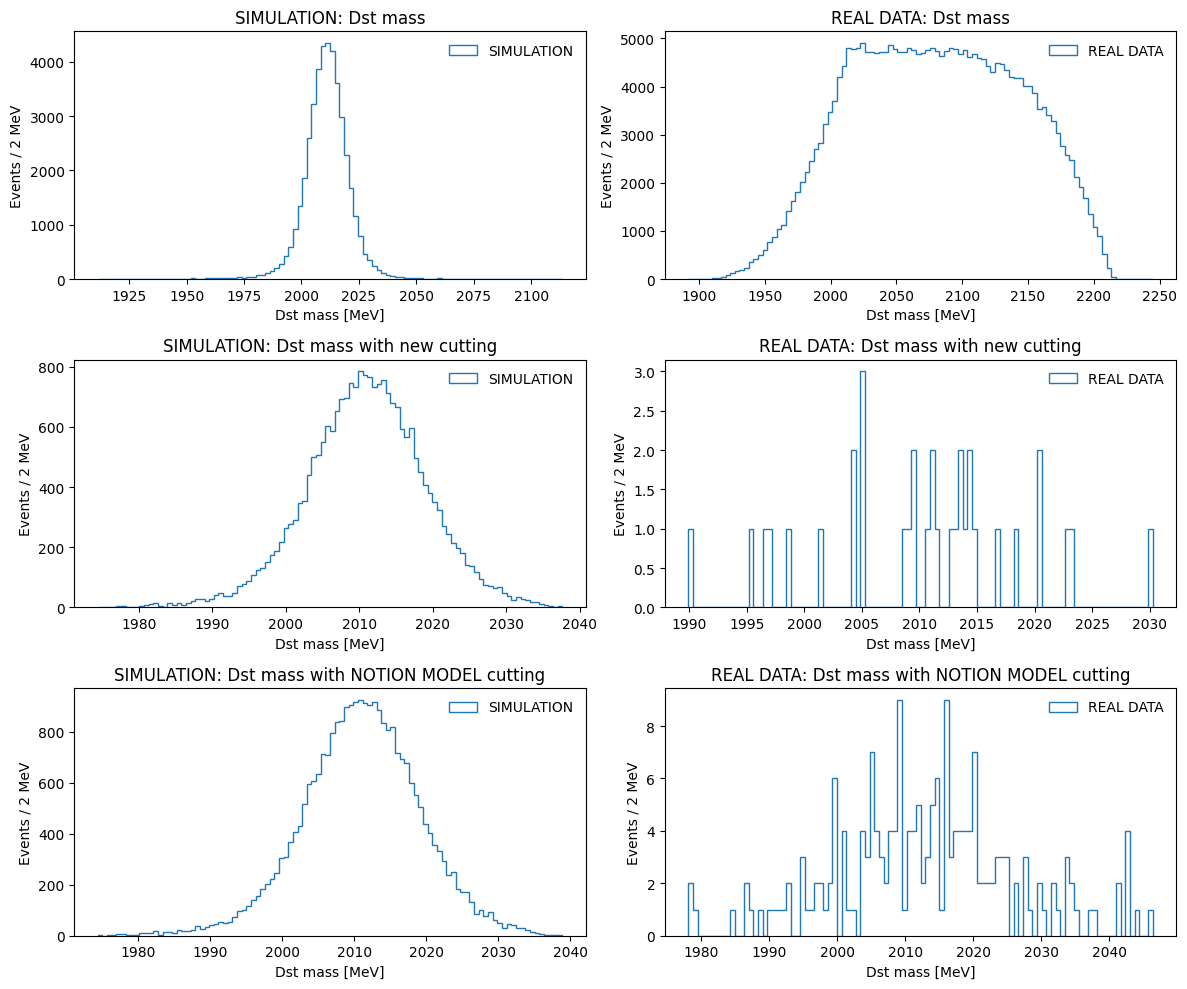

In [91]:
#NEW CUT CHECKING

simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(3, 2, figsize=(12, 10))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with new cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with new cutting')
ax[1,1].legend(frameon=False)

ax[2,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[2,0].set_xlabel('Dst mass [MeV]')
ax[2,0].set_ylabel('Events / 2 MeV')
ax[2,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[2,0].legend(frameon=False)

ax[2,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[2,1].set_xlabel('Dst mass [MeV]')
ax[2,1].set_ylabel('Events / 2 MeV')
ax[2,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[2,1].legend(frameon=False)

plt.tight_layout()
plt.show()

Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.95 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2012.93 MeV


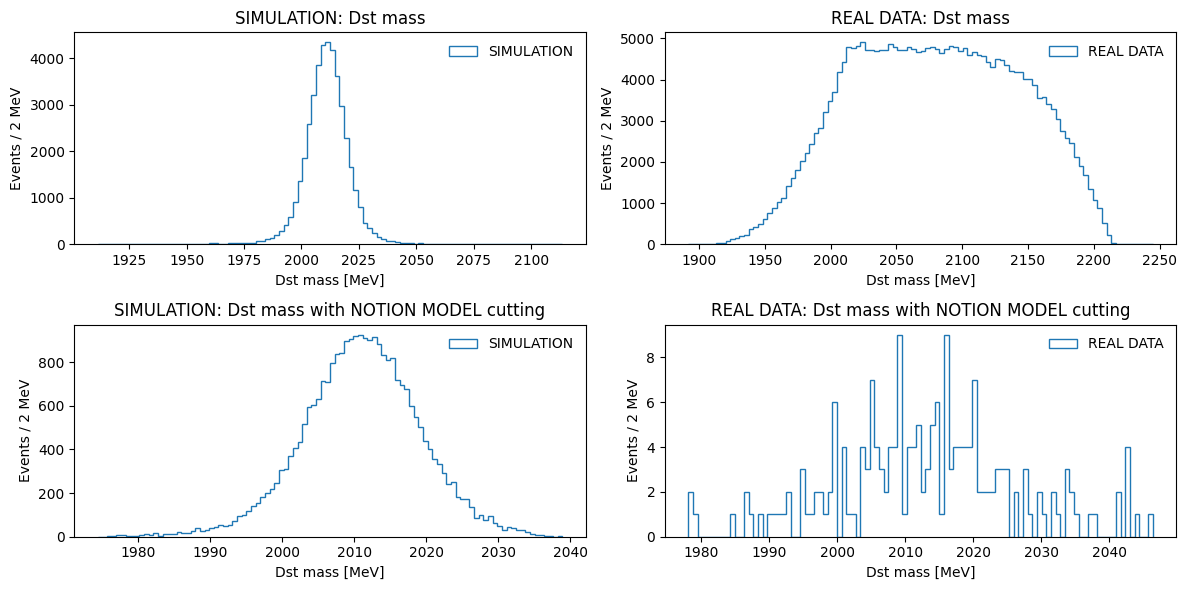

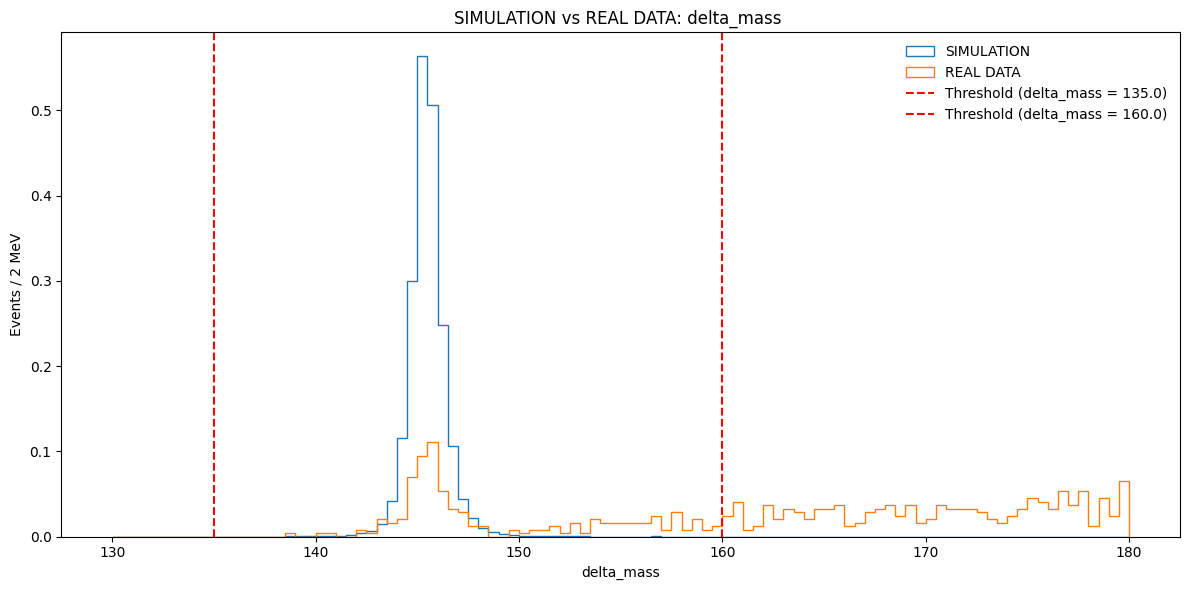

In [78]:
#delta_mass checking ((delta_mass>135.0) & (delta_mass<160.0))


simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst_original)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst_original)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Dst_without_delta_mass)['delta_mass'],density = True, bins=100, histtype='step', range=(130,180), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Dst_without_delta_mass)['delta_mass'],density = True, bins=100, histtype='step', range=(130,180), label='REAL DATA')
axes.axvline(x=135.0, color='red', linestyle='--', label='Threshold (delta_mass = 135.0)')
axes.axvline(x=160.0, color='red', linestyle='--', label='Threshold (delta_mass = 160.0)')
axes.set_xlabel('delta_mass')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: delta_mass ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()

Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.95 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2012.93 MeV


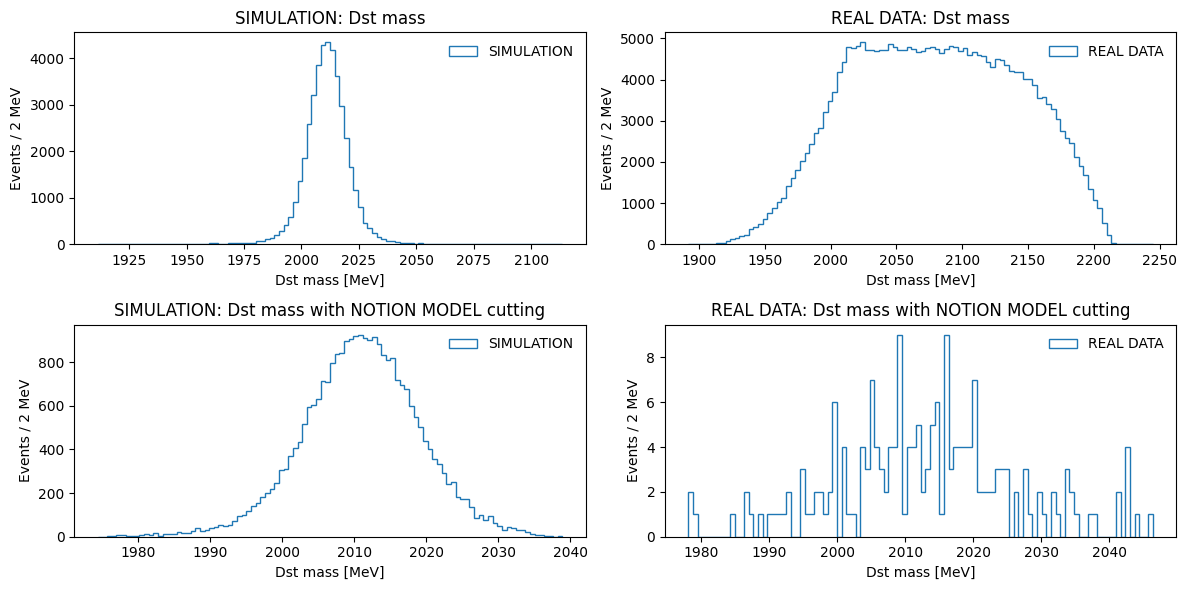

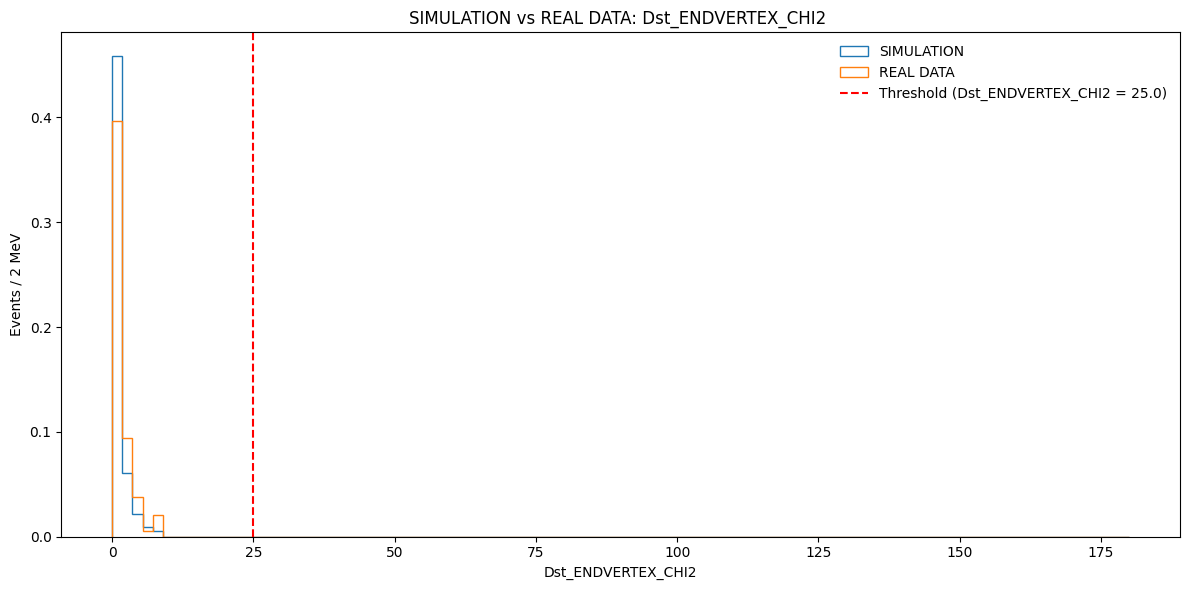

In [79]:
#Dst_ENDVERTEX_CHI2 checking (Dst_ENDVERTEX_CHI2<25.0)


simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst_original)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst_original)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Dst_without_Dst_ENDVERTEX_CHI2)['Dst_ENDVERTEX_CHI2'],density = True, bins=100, histtype='step', range=(0,180), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Dst_without_Dst_ENDVERTEX_CHI2)['Dst_ENDVERTEX_CHI2'],density = True, bins=100, histtype='step', range=(0,180), label='REAL DATA')
axes.axvline(x=25.0, color='red', linestyle='--', label='Threshold (Dst_ENDVERTEX_CHI2 = 25.0)')
axes.set_xlabel('Dst_ENDVERTEX_CHI2')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: Dst_ENDVERTEX_CHI2 ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()

Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.95 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2012.93 MeV


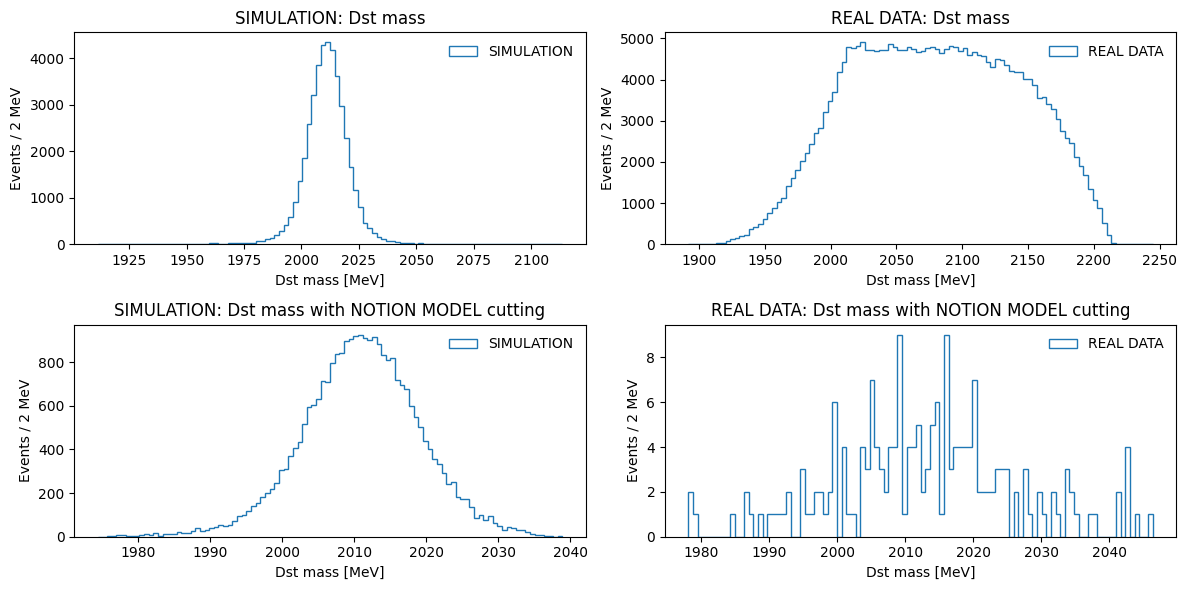

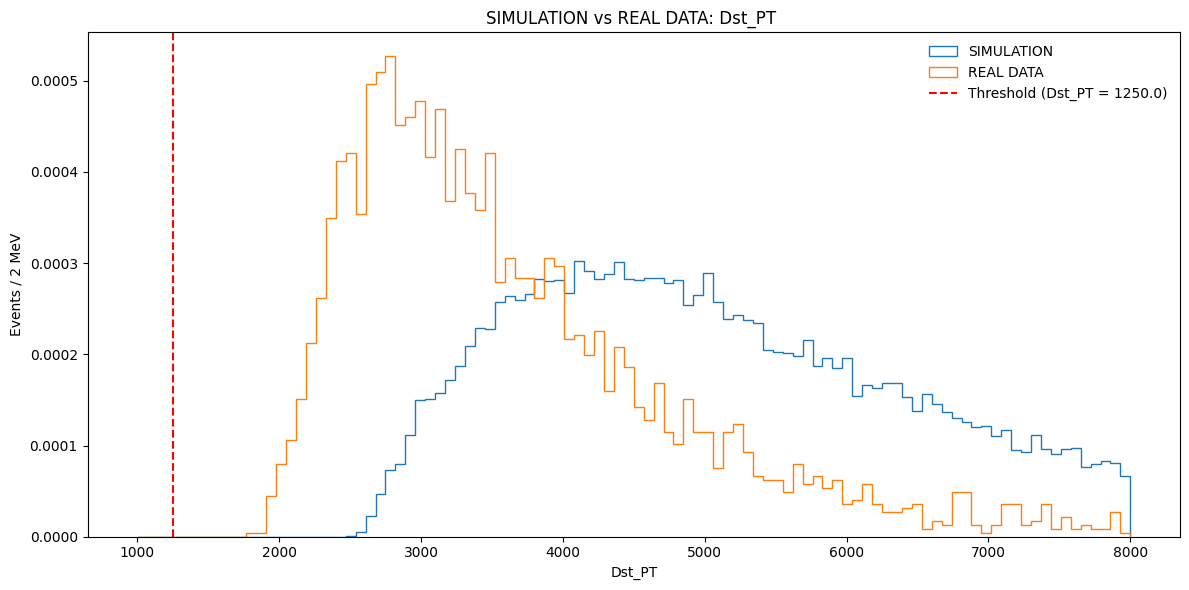

In [80]:
#Dst_PT checking (Dst_PT>1250.0)

simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst_original)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst_original)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Dst_without_Dst_PT)['Dst_PT'],density = True, bins=100, histtype='step', range=(1000,8000), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Dst_without_Dst_PT)['Dst_PT'],density = True, bins=100, histtype='step', range=(1000,8000), label='REAL DATA')
axes.axvline(x=1250.0, color='red', linestyle='--', label='Threshold (Dst_PT = 1250.0)')
axes.set_xlabel('Dst_PT')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: Dst_PT ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()

Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.95 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2012.93 MeV


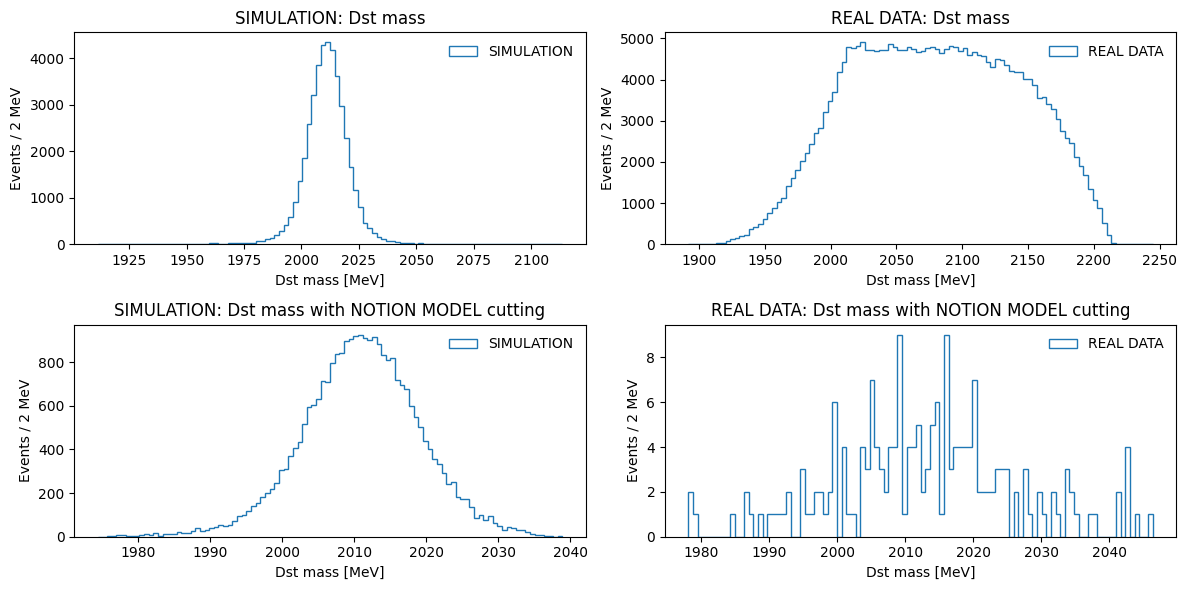

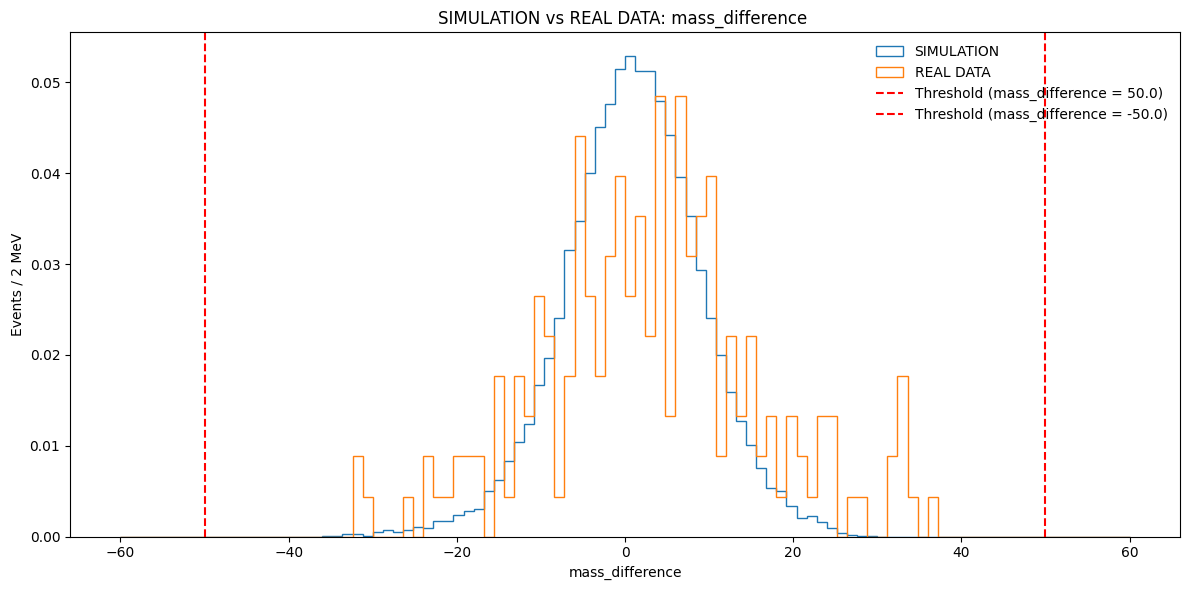

In [81]:
#mass_difference checking (abs(mass_difference)<50.0)

real_data['mass_difference'] = real_data['Dst_M'] - 2010.
simu_data['mass_difference'] = simu_data['Dst_M'] - 2010.

simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst_original)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst_original)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Dst_without_mass_difference)['mass_difference'],density = True, bins=100, histtype='step', range=(-60,60), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Dst_without_mass_difference)['mass_difference'],density = True, bins=100, histtype='step', range=(-60,60), label='REAL DATA')
axes.axvline(x=50.0, color='red', linestyle='--', label='Threshold (mass_difference = 50.0)')
axes.axvline(x=-50.0, color='red', linestyle='--', label='Threshold (mass_difference = -50.0)')
axes.set_xlabel('mass_difference')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: mass_difference ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()

Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.95 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2012.93 MeV


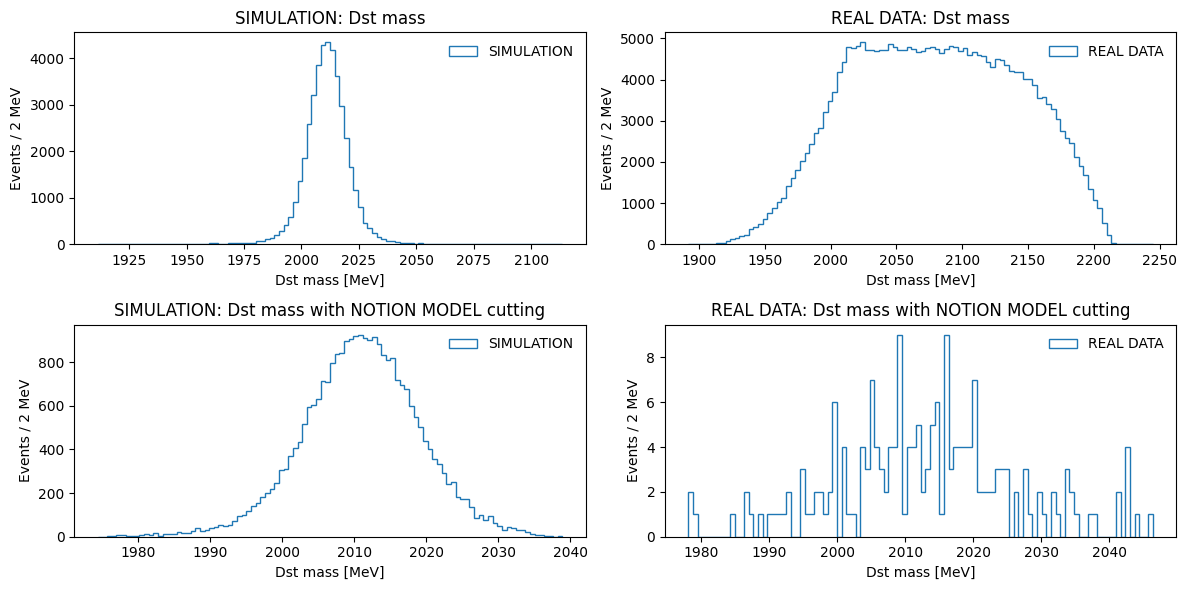

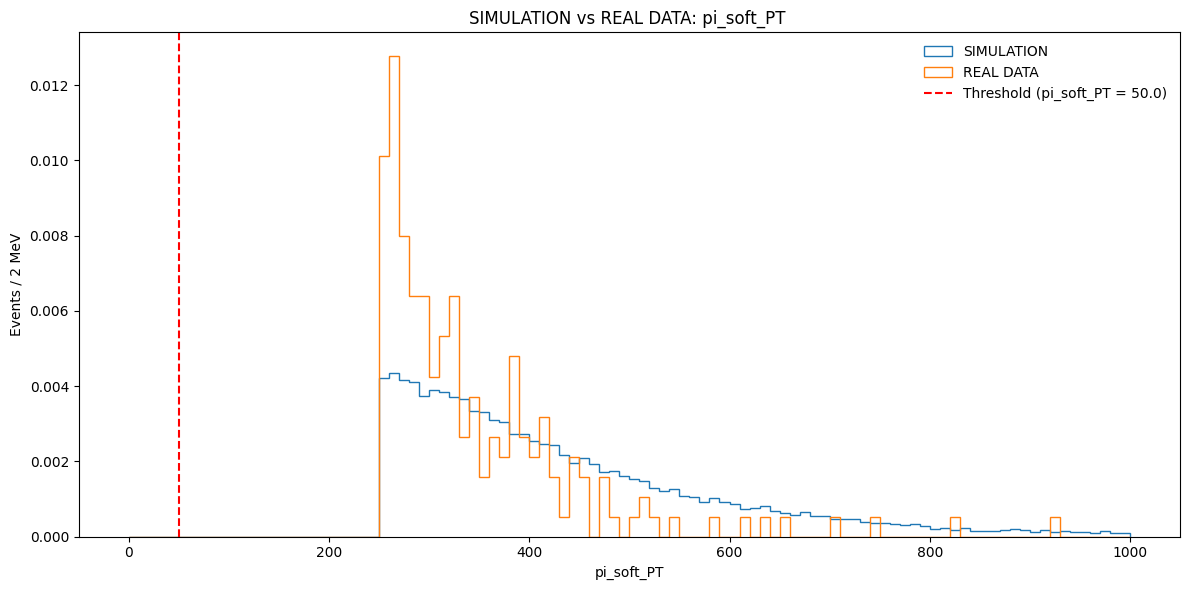

In [88]:
#pi_soft_PT checking (abs(pi_soft_PT)>50.0)

simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst_original)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst_original)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Dst_without_pi_soft_PT)['pi_soft_PT'],density = True, bins=100, histtype='step', range=(0,1000), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Dst_without_pi_soft_PT)['pi_soft_PT'],density = True, bins=100, histtype='step', range=(0,1000), label='REAL DATA')
axes.axvline(x=50.0, color='red', linestyle='--', label='Threshold (pi_soft_PT = 50.0)')
axes.set_xlabel('pi_soft_PT')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: pi_soft_PT ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()

Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.95 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2012.93 MeV


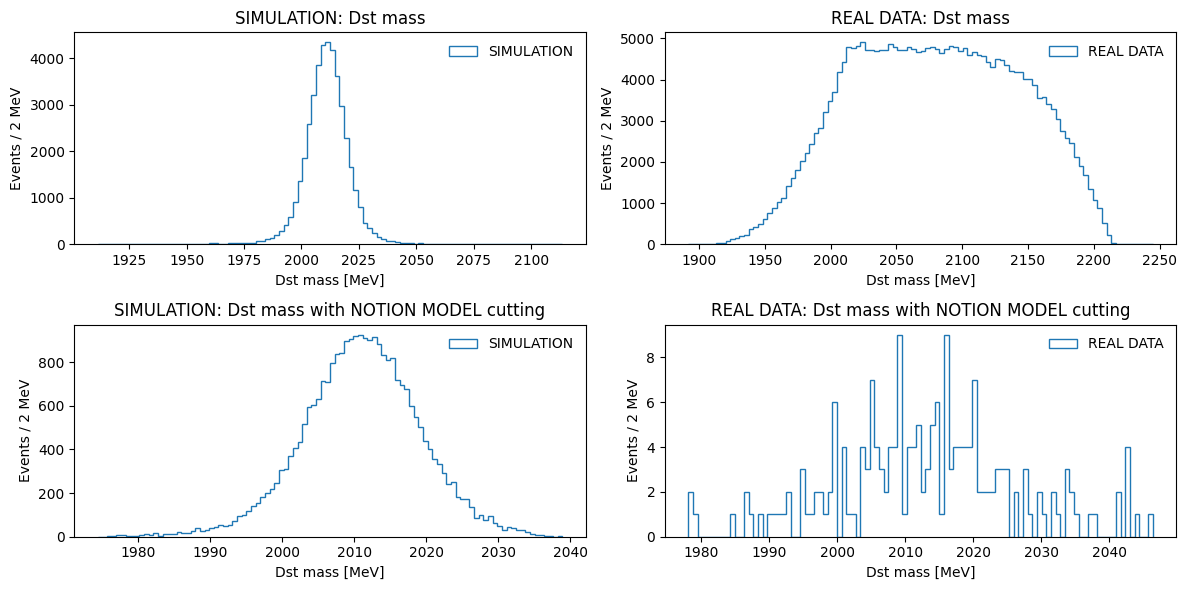

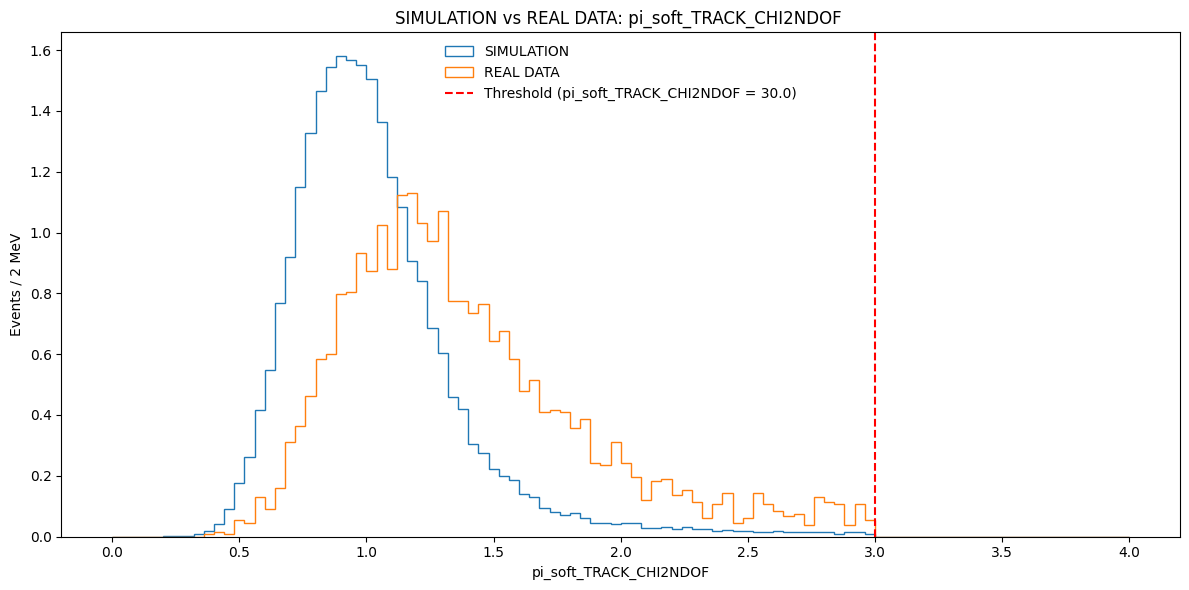

In [90]:
#pi_soft_TRACK_CHI2NDOF checking (pi_soft_TRACK_CHI2NDOF<30.0)

simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst_original)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst_original)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Dst_without_pi_soft_TRACK_CHI2NDOF)['pi_soft_TRACK_CHI2NDOF'],density = True, bins=100, histtype='step', range=(0,4), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Dst_without_pi_soft_TRACK_CHI2NDOF)['pi_soft_TRACK_CHI2NDOF'],density = True, bins=100, histtype='step', range=(0,4), label='REAL DATA')
axes.axvline(x=3.0, color='red', linestyle='--', label='Threshold (pi_soft_TRACK_CHI2NDOF = 30.0)')
axes.set_xlabel('pi_soft_TRACK_CHI2NDOF')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: pi_soft_TRACK_CHI2NDOF ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()

Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.95 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2012.93 MeV


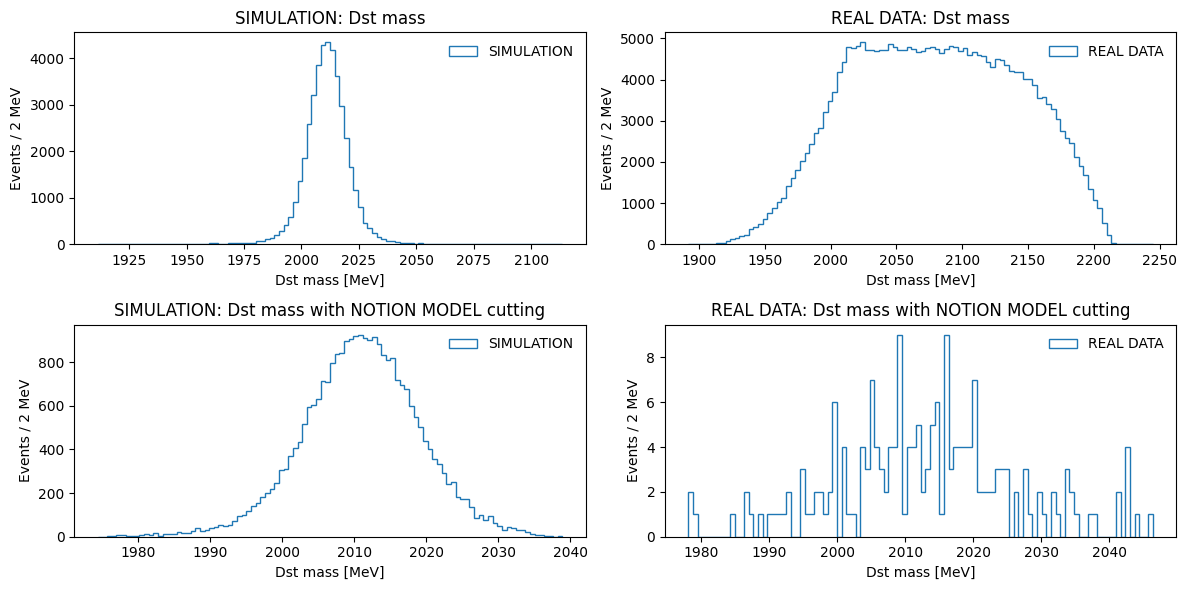

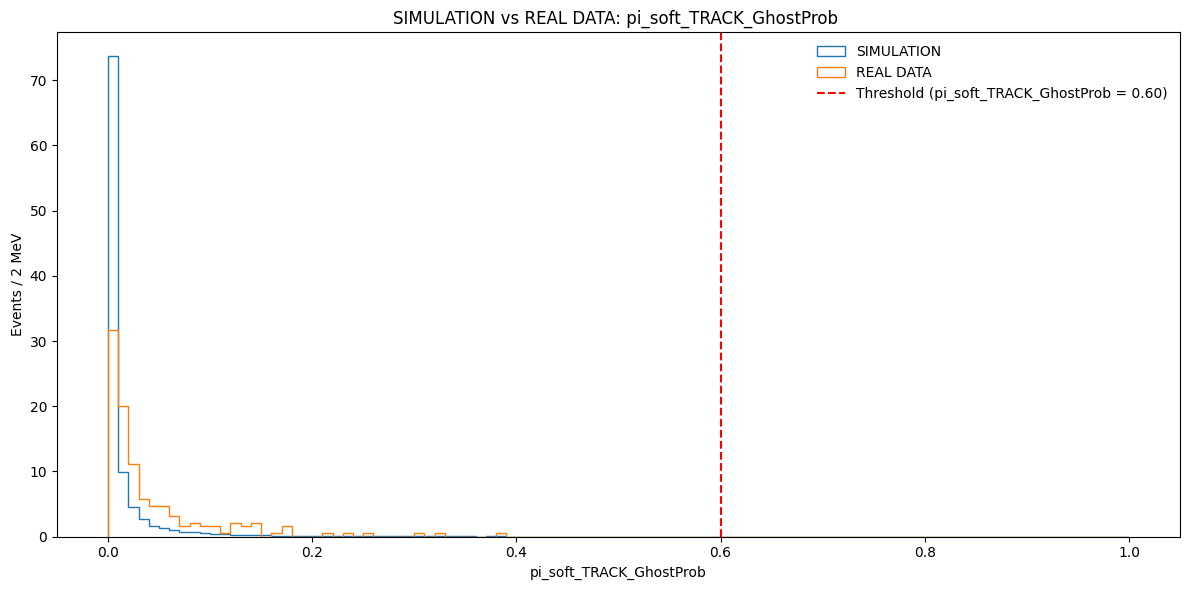

In [84]:
#pi_soft_TRACK_GhostProb checking (pi_soft_TRACK_GhostProb<0.6)

simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst_original)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst_original)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Dst_without_pi_soft_TRACK_GhostProb)['pi_soft_TRACK_GhostProb'],density = True, bins=100, histtype='step', range=(0,1), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Dst_without_pi_soft_TRACK_GhostProb)['pi_soft_TRACK_GhostProb'],density = True, bins=100, histtype='step', range=(0,1), label='REAL DATA')
axes.axvline(x=0.60, color='red', linestyle='--', label='Threshold (pi_soft_TRACK_GhostProb = 0.60)')
axes.set_xlabel('pi_soft_TRACK_GhostProb')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: pi_soft_TRACK_GhostProb ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()

Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.95 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2012.93 MeV


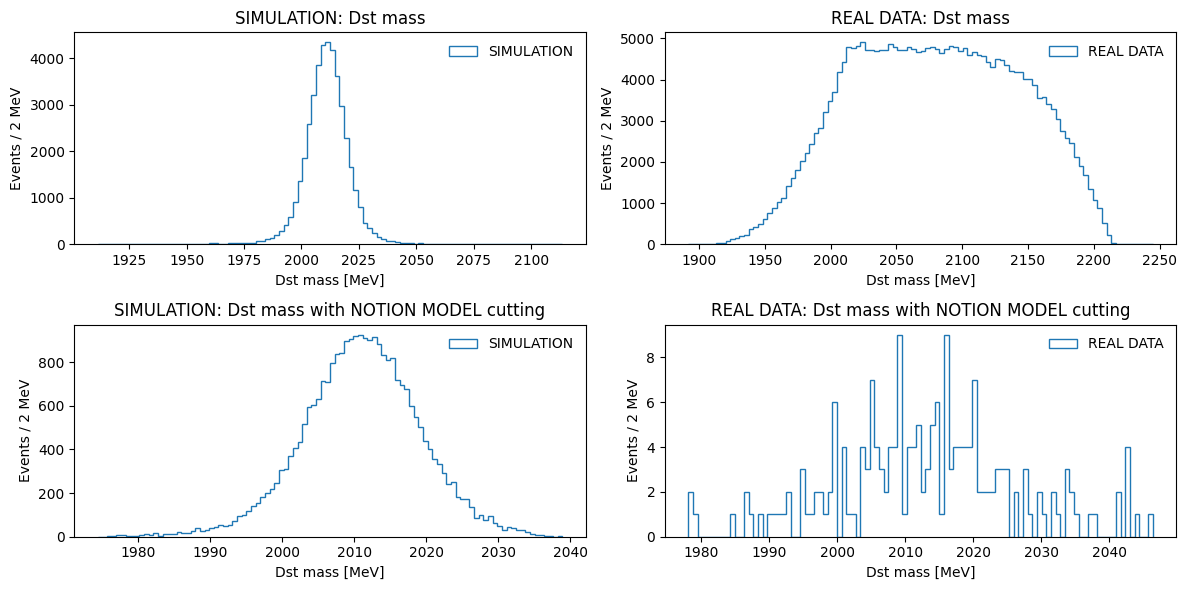

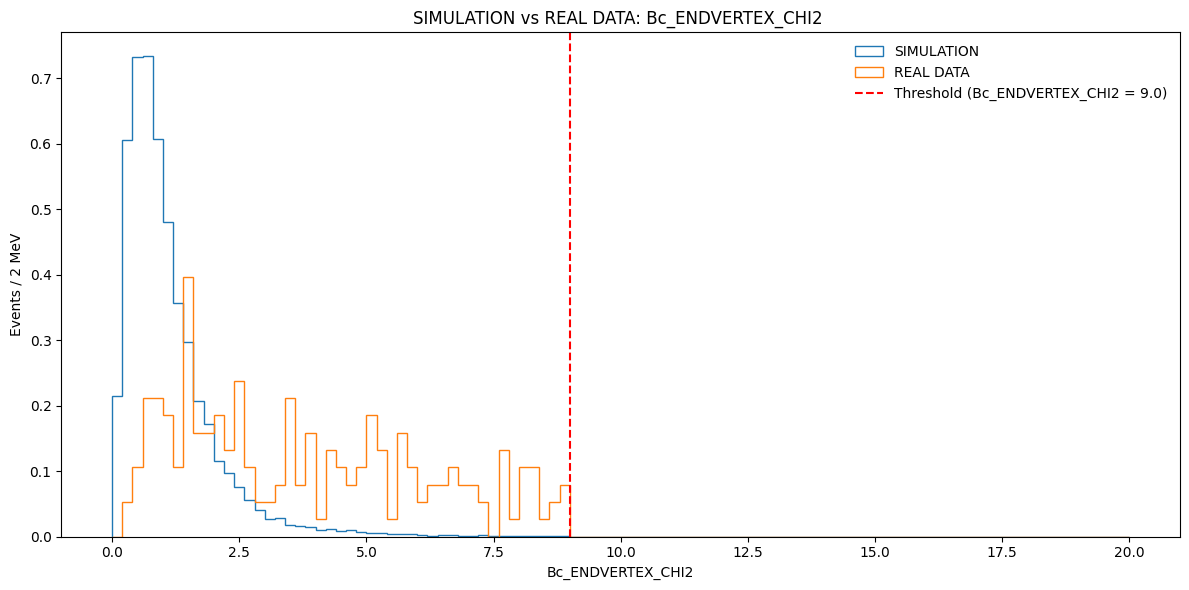

In [85]:
#Bc_ENDVERTEX_CHI2 checking (Bc_ENDVERTEX_CHI2<9.)

simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst_original)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst_original)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Dst_without_Bc_ENDVERTEX_CHI2)['Bc_ENDVERTEX_CHI2'],density = True, bins=100, histtype='step', range=(0,20), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Dst_without_Bc_ENDVERTEX_CHI2)['Bc_ENDVERTEX_CHI2'],density = True, bins=100, histtype='step', range=(0,20), label='REAL DATA')
axes.axvline(x=9.0, color='red', linestyle='--', label='Threshold (Bc_ENDVERTEX_CHI2 = 9.0)')
axes.set_xlabel('Bc_ENDVERTEX_CHI2')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: Bc_ENDVERTEX_CHI2 ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()

Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.95 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2012.93 MeV


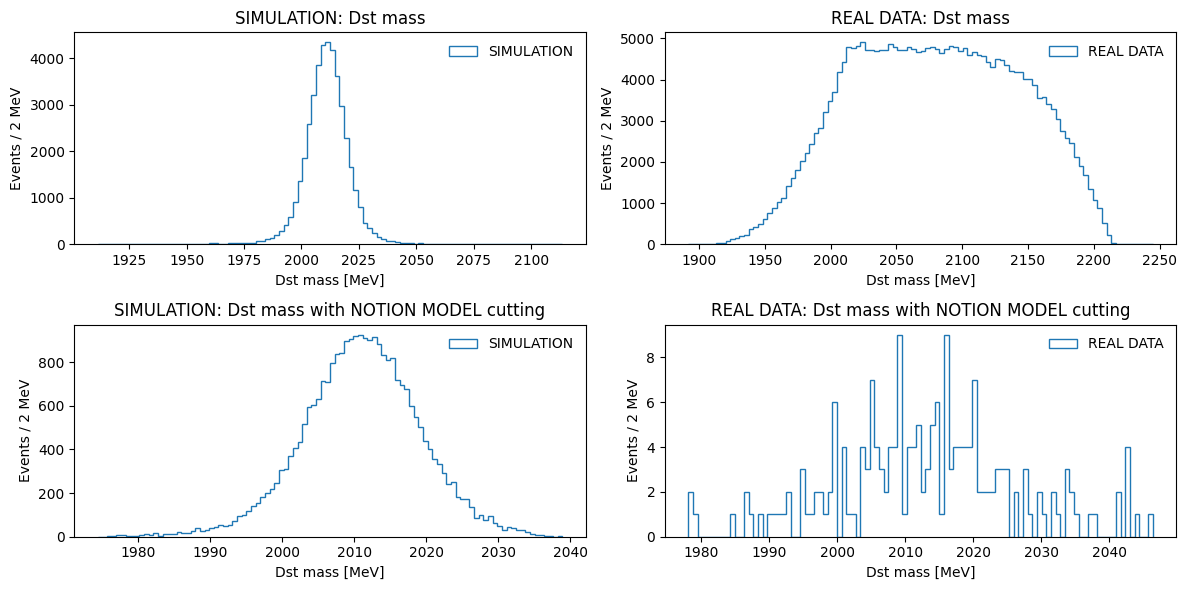

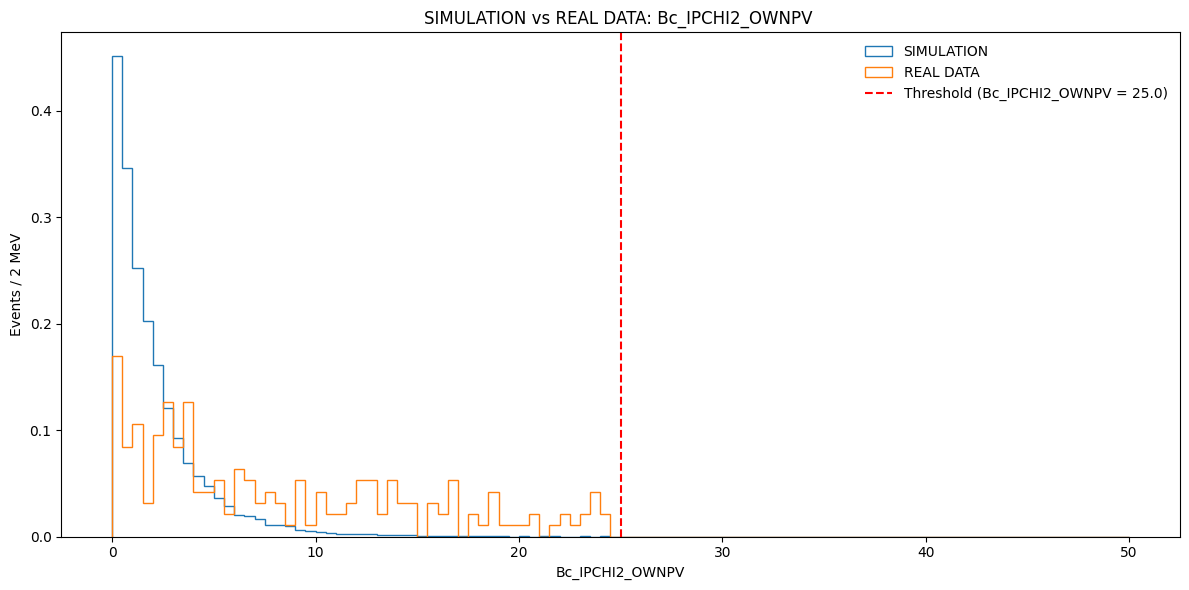

In [86]:
#Bc_IPCHI2_OWNPV checking (Bc_IPCHI2_OWNPV<25.)

simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst_original)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst_original)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Dst_without_Bc_IPCHI2_OWNPV)['Bc_IPCHI2_OWNPV'],density = True, bins=100, histtype='step', range=(0,50), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Dst_without_Bc_IPCHI2_OWNPV)['Bc_IPCHI2_OWNPV'],density = True, bins=100, histtype='step', range=(0,50), label='REAL DATA')
axes.axvline(x=25.0, color='red', linestyle='--', label='Threshold (Bc_IPCHI2_OWNPV = 25.0)')
axes.set_xlabel('Bc_IPCHI2_OWNPV')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: Bc_IPCHI2_OWNPV ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()

Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2079.41 MeV
Mean of SIMULATION with NOTION MODEL cutting: 2010.95 MeV
Mean of REAL DATA with NOTION MODEL cutting: 2012.93 MeV


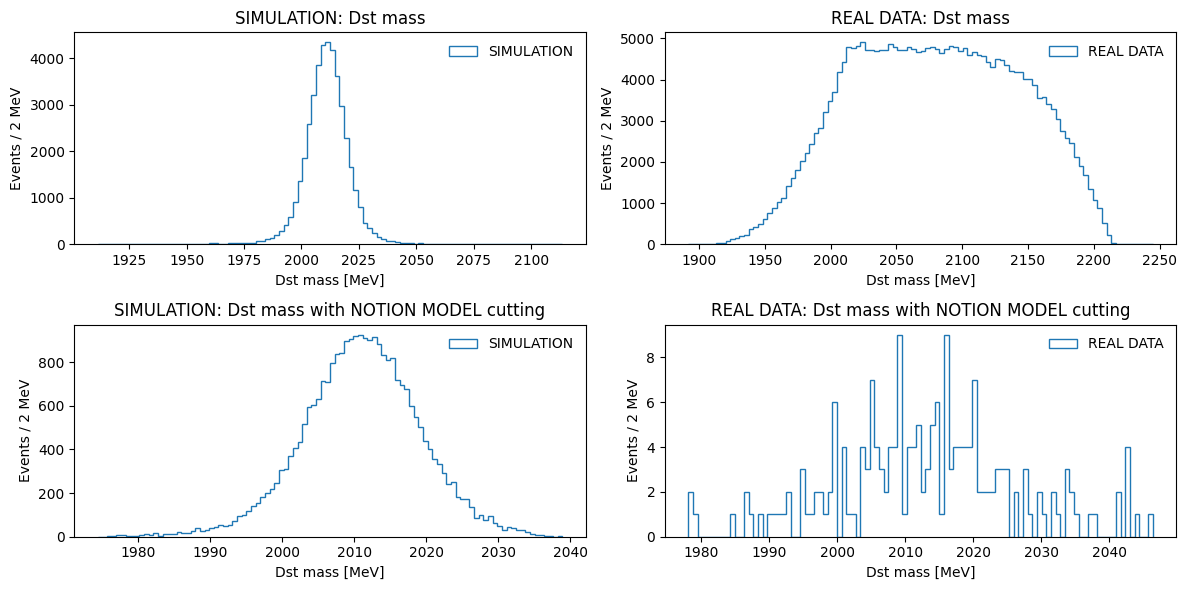

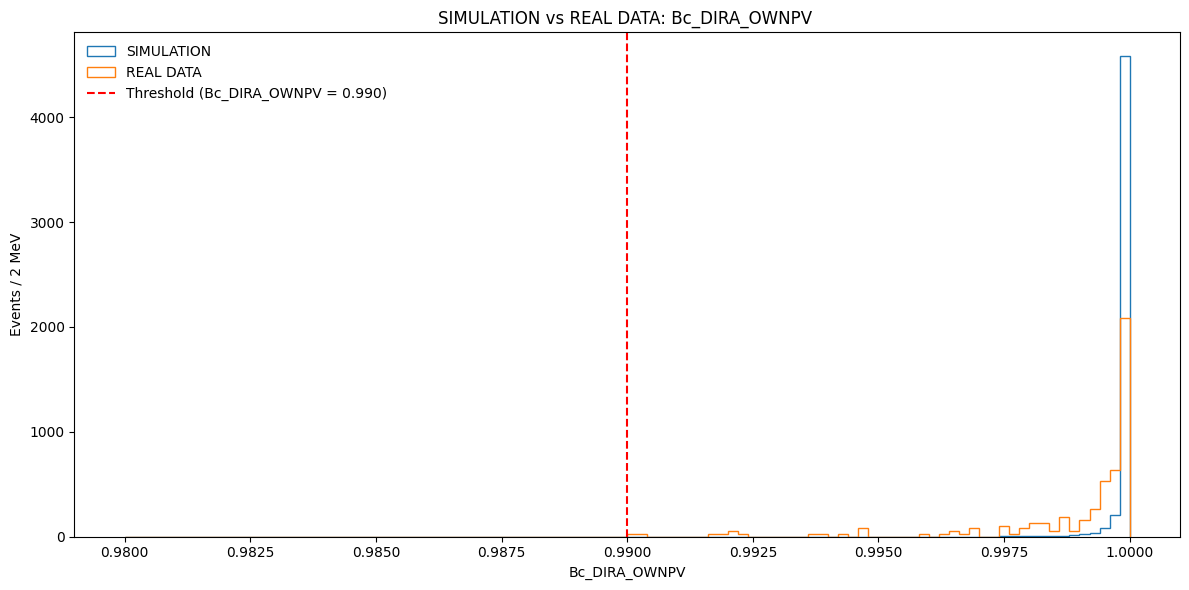

In [87]:
#Bc_DIRA_OWNPV checking (Bc_DIRA_OWNPV>0.99)

simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(Notion_model_selection_Dst_original)['Dst_M']
real_data_cut = real_data.query(Notion_model_selection_Dst_original)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Dst_original)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Dst_without_Bc_DIRA_OWNPV)['Bc_DIRA_OWNPV'],density = True, bins=100, histtype='step', range=(0.98,1), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Dst_without_Bc_DIRA_OWNPV)['Bc_DIRA_OWNPV'],density = True, bins=100, histtype='step', range=(0.98,1), label='REAL DATA')
axes.axvline(x=0.990, color='red', linestyle='--', label='Threshold (Bc_DIRA_OWNPV = 0.990)')
axes.set_xlabel('Bc_DIRA_OWNPV')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: Bc_DIRA_OWNPV ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()